In [15]:
from IPython.display import display, Math, Markdown
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from typing import Tuple
from pathlib import Path

figure_dir = Path().cwd().joinpath('Figures')
if not figure_dir.exists():
    figure_dir.mkdir()

# 14.1

Given the data
0.90 1.32 1.96 1.85 2.29 1.42 1.35 1.47 1.74 1.82
1.30 1.47 1.92 1.65 2.06 1.55 1.95 1.35 1.78 2.14
1.63 1.66 1.05 1.71 1.27

Determine
- (a) the mean
- (b) median
- (c) mode
- (d) range
- (e) standard deviation
- (f) variance
- (g) coefficient of variation

In [16]:
p_14_1_data = np.array([0.90, 1.32, 1.96, 1.85, 2.29, 1.42, 1.35, 1.47, 1.74, 1.82,
1.30, 1.47, 1.92, 1.65, 2.06, 1.55, 1.95, 1.35, 1.78, 2.14,
1.63, 1.66, 1.05, 1.71, 1.27])

def mean(data):
    return sum(data)/len(data)

display(Markdown(fr'- (a) The mean = $\frac{{\sum_k x_k}}{{n}} = $ {mean(p_14_1_data):0.2f}'))

def median(data):
    sorted_data =  sorted(data)
    n = len(sorted_data)
    if n % 2 == 0:
        median_value = (sorted_data[n//2-1] + sorted_data[n//2]) / 2
    else:
        median_value = sorted_data[n//2]
    return median_value

display(Markdown(f'- (b) The median = {median(p_14_1_data):0.2f}'))

def mode(data):
    if len(set(data)) == len(data):
        return np.nan
    return max(set(data), key=data.tolist().count)

display(Markdown(f'- (c) The mode = {mode(p_14_1_data):0.2f}'))

display(Markdown(f'- (d) The range = {max(p_14_1_data)-min(p_14_1_data):0.2f}'))

def variance(data):
    data_mean = mean(data)
    n = len(data)
    sum_squared_diff = sum((x - data_mean) ** 2 for x in data)
    return sum_squared_diff / (n - 1)

def standard_deviation(data):
    return variance(data)**0.5

display(Markdown(f'- (e) standard deviation'))
display(Math(fr"\sigma^2=\frac{{\sum_k (x_k-\mu)^2}}{{n-1}}"
             fr"= {standard_deviation(p_14_1_data):0.2f}"))

display(Markdown(f'- (f) variance'))
display(Math(fr"var(x)=\sigma= {variance(p_14_1_data):0.2f}"))

def coefficient_of_variation(data):
    return standard_deviation(data)/mean(data)

display(Markdown(f'- (g) coefficient of variation'))
display(Math(fr"CV=\sigma/\mu={coefficient_of_variation(p_14_1_data):0.2f}"))

- (a) The mean = $\frac{\sum_k x_k}{n} = $ 1.62

- (b) The median = 1.65

- (c) The mode = 1.35

- (d) The range = 1.39

- (e) standard deviation

<IPython.core.display.Math object>

- (f) variance

<IPython.core.display.Math object>

- (g) coefficient of variation

<IPython.core.display.Math object>

---
# 14.2

Construct a histogram from the data from Prob. 14.1.
Use a range from 0.8 to 2.4 with intervals of 0.2.

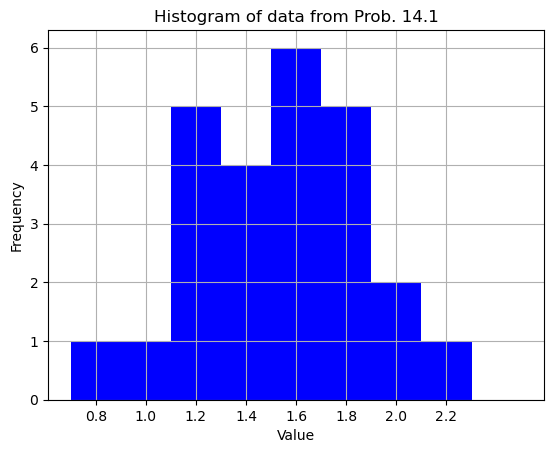

In [17]:
p_14_2_data = dict(
    x=p_14_1_data,
    interval=0.2,
    x_range=(0.8, 2.4)
)

def histogram(data: np.ndarray, x_range:Tuple[float, float], interval: float):
    x_min, x_max = x_range
    bins = np.arange(x_min, x_max+interval, interval)
    hist = np.zeros(len(bins))
    for x in data:
        if x_min <= x < x_max:
            hist[int((x-x_min)/interval)] += 1
        elif x >= x_max:
            hist[-1] += 1
        else:
            hist[0] += 1
    return bins, hist

plt.bar(
    *histogram(
        data=p_14_2_data['x'],
        x_range=p_14_2_data['x_range'],
        interval=p_14_2_data['interval']
    ),
    width=0.2,
    color='blue')
plt.grid()
plt.title('Histogram of data from Prob. 14.1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(np.arange(0.8, 2.4, 0.2))
plt.savefig(figure_dir.joinpath('14_2.png'))
plt.show()

# 15.1
Fit a parabola to the data from Table 14.1. Determine the $r^2$ for the fit and comment on the efficacy of the result.

TABLE 14.1 Experimental data for force (N) and velocity (m/s) from a wind tunnel experiment.
| $υ, m/s$ | 10 | 20 | 30  | 40  | 50  | 60   | 70  | 80   |
|--------|----|----|-----|-----|-----|------|-----|------|
| $F, N$   | 25 | 70 | 380 | 550 | 610 | 1220 | 830 | 1450 |

$$F=C_d v^2$$
$$[F] = C_d [v^2]$$

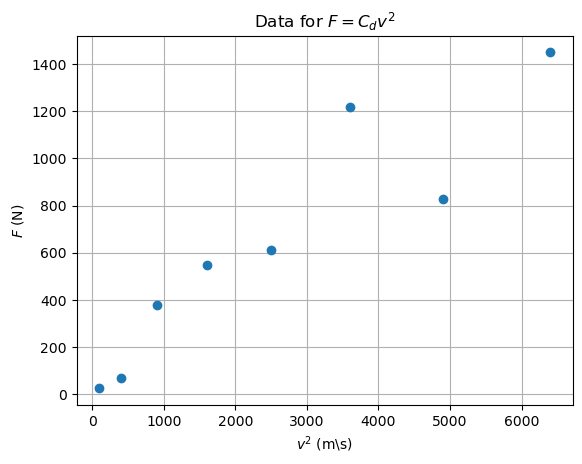

In [18]:
table_14_1 = pd.DataFrame(
    data={
        'v': [10, 20, 30, 40, 50, 60, 70, 80],
        'F': [25, 70, 380, 550, 610, 1220, 830, 1450]
    }
)
plt.plot(table_14_1['v'].pow(2), table_14_1['F'], 'o')
plt.grid()
plt.xlabel('$v^2$ (m\\s)')
plt.ylabel('$F$ (N)')
plt.title('Data for $F=C_d v^2$')
plt.savefig(figure_dir.joinpath('15_1_data.png'))


<IPython.core.display.Math object>

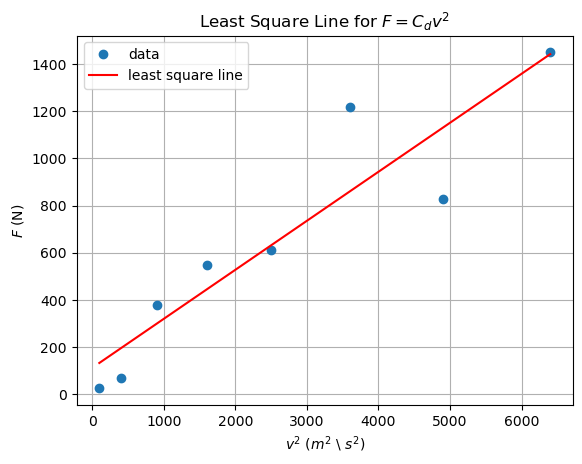

In [19]:
def least_square_line(x_data: np.array, y_data: np.array) -> Tuple[float, float]:
    xy = np.sum(x_data*y_data)
    x = np.sum(x_data)
    y = np.sum(y_data)
    x2 = np.sum(x_data**2)
    n = len(x_data)
    a = (n* xy - x*y)/(n*x2 - x**2)
    y_bar = y/n
    x_bar = x/n
    b = y_bar - a*x_bar
    return a, b

def line(x: float, m: float, c: float) -> float:
    return m*x + c

def line_from_data(x_data: np.array, y_data: np.array) -> np.array:
    a, b = least_square_line(x_data, y_data)
    display(Math(fr"F={a:.2f}v^2+{b:.2f}"))
    return line(x_data, a, b)

table_14_1['ls_line'] = line_from_data(table_14_1['v'].pow(2), table_14_1['F'])
fig, ax = plt.subplots()
plt.plot(table_14_1['v'].pow(2), table_14_1['F'], 'o' ,label='data')
plt.plot(table_14_1['v'].pow(2), table_14_1['ls_line'], '-', color='red', label='least square line')
plt.xlabel('$v^2$ ($m^2$ \\ $s^2$)')
plt.ylabel('$F$ (N)')
plt.title('Least Square Line for $F=C_d v^2$')
plt.legend()
plt.grid()
plt.savefig(figure_dir.joinpath('15_1.png'))

In [20]:
print(f"{(table_14_1['ls_line'] - table_14_1['F']).pow(2).sum():,}")

265,165.36064425774


In [21]:
def coefficient_of_determination(x_data: np.array, y_data: np.array) -> float:
    n, m = len(x_data), len(y_data)
    assert m==n, f'x_data and y_data must have the same length, but got {m} and {n}'
    x = np.sum(x_data)
    y = np.sum(y_data)
    x2 = np.sum(x_data**2)
    y2 = np.sum(y_data**2)
    xy = np.sum(x_data*y_data)
    return (n*xy - x*y)/(np.sqrt(n*x2-x**2)*np.sqrt(n*y2-y**2))

display(Math(fr"r^2 = {coefficient_of_determination(table_14_1['ls_line'], table_14_1['F']):0.3%}\\%"))

<IPython.core.display.Math object>

---
# 15.2


<IPython.core.display.Math object>

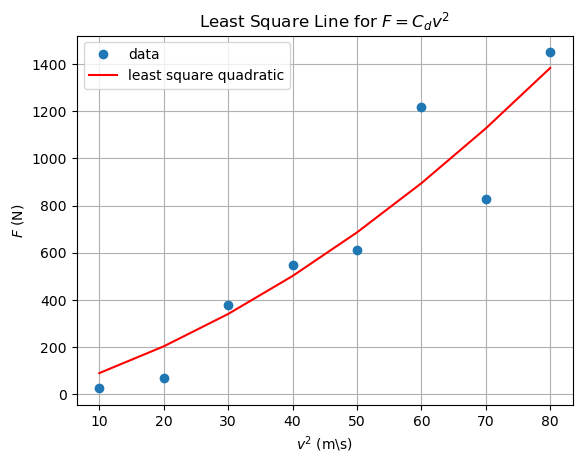

In [22]:
def least_square_quadratic(x_data: np.array, y_data: np.array)-> Tuple[float, float]:
    xy = np.sum(x_data * y_data)
    x2y = np.sum(np.power(x_data, 2) * y_data)
    x2 = np.sum(np.power(x_data, 2))
    x3 = np.sum(np.power(x_data, 3))
    x4 = np.sum(np.power(x_data, 4))

    delta = x2 * x4 - x3 ** 2
    delta_a = xy * x4 - x3 * x2y
    delta_b = x2 * x2y - xy * x3

    return delta_a/delta, delta_b/delta

def quadratic(x: float, a_1: float, a_2: float) -> float:
    return a_1*x**2 + a_2*x

def quadratic_from_data(x_data: np.array, y_data: np.array) -> np.array:
    a, b = least_square_quadratic(x_data, y_data)
    display(Math(fr"F={a:.2f}v^2+{b:.2f}v"))
    return quadratic(x_data, b, a)

table_14_1['ls_quad'] = quadratic_from_data(table_14_1['v'], table_14_1['F'])
plt.plot(table_14_1['v'], table_14_1['F'], 'o' ,label='data')
plt.plot(table_14_1['v'], table_14_1['ls_quad'], label='least square quadratic', color='red')
plt.xlabel('$v^2$ (m\\s)')
plt.ylabel('$F$ (N)')
plt.title('Least Square Line for $F=C_d v^2$')
plt.legend()
plt.grid()
plt.savefig(figure_dir.joinpath('15_2.png'))


In [23]:
display(Math(fr"r^2 = {coefficient_of_determination(table_14_1['v'], table_14_1['F']):0.3%}"))
display(Math(fr"MSE = {(table_14_1['ls_quad'] - table_14_1['F']).pow(2).sum():,.3f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
# 15.3
Fit cubic polynomial to the following data

| $x$ | 3   | 4   | 5   | 7   | 8   | 9   | 11  | 12  |
|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| $y$ | 1.6 | 3.6 | 4.4 | 3.4 | 2.2 | 2.8 | 3.8 | 4.6 |

In [24]:
table_15_3 = pd.DataFrame(
    data={
        'x': [3, 4, 5, 7, 8, 9, 11, 12],
        'y': [1.6, 3.6, 4.4, 3.4, 2.2, 2.8, 3.8, 4.6]
    }
)


<IPython.core.display.Math object>

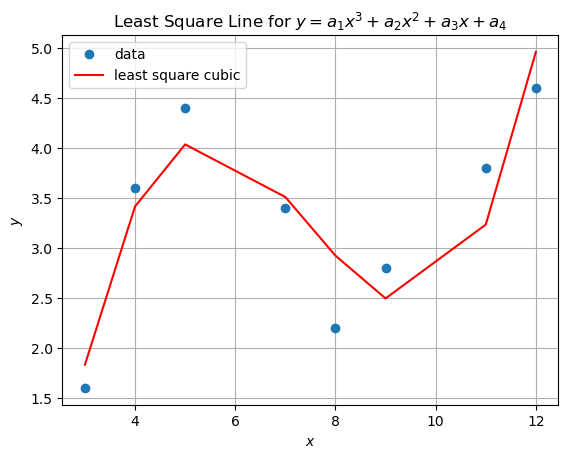

In [25]:
def cube_fitting(x_data: np.array, y_data: np.array) -> Tuple[float, float, float, float]:
    n = len(x_data)
    assert n == len(y_data), f'x_data and y_data must have the same length, but got {n} and {len(y_data)}'
    x = np.sum(x_data)
    x2 = np.sum(x_data**2)
    x3 = np.sum(x_data**3)
    x4 = np.sum(x_data**4)
    x5 = np.sum(x_data**5)
    x6 = np.sum(x_data**6)
    y = np.sum(y_data)
    xy = np.sum(x_data*y_data)
    x2y = np.sum(np.power(x_data, 2) * y_data)
    x3y = np.sum(np.power(x_data, 3) * y_data)

    a = np.array([
        [n, x, x2, x3],
        [x, x2, x3, x4],
        [x2, x3, x4, x5],
        [x3, x4, x5, x6]
    ])
    b = np.array([y, xy, x2y, x3y])
    c = np.linalg.solve(a, b)
    return c[3], c[2], c[1], c[0]

def cubic(x: float, a_1: float, a_2: float, a_3: float, a_4: float) -> float:
    display(Math(fr"F={a_1:.2f}x^3+{a_2:.2f}x^2+{a_3:.2f}x+{a_4:.2f}"))
    return a_1*x**3 + a_2*x**2 + a_3*x + a_4

def cubic_from_data(x_data: np.array, y_data: np.array) -> np.array:
    a, b, c, d = cube_fitting(x_data, y_data)
    return cubic(x_data, a, b, c, d)

table_15_3['ls_cubic'] = cubic_from_data(table_15_3['x'], table_15_3['y'])

plt.plot(table_15_3['x'], table_15_3['y'], 'o' ,label='data')
plt.plot(table_15_3['x'], table_15_3['ls_cubic'], label='least square cubic', color='red')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Least Square Line for $y=a_1x^3+a_2x^2+a_3x+a_4$')
plt.legend()
plt.grid()
plt.savefig(figure_dir.joinpath('15_3.png'))

In [26]:
r_2_15_3 = coefficient_of_determination(table_15_3['y'], table_15_3['ls_cubic'])
display(Math(fr"r^2 = {r_2_15_3:0.3%}\%"))

<IPython.core.display.Math object>

In [27]:
s_r = ((table_15_3['ls_cubic'] - table_15_3['y']).pow(2)).sum()
s_y_x = np.sqrt(s_r/(len(table_15_3)-2))
display(Math(fr"S_{{\frac{{y}}{{x}}}} = \sqrt{{\frac{{S_r}}{{n-2}}}}={s_y_x:0.3f}"))


<IPython.core.display.Math object>